<a href="https://colab.research.google.com/github/thuvarahan97/ADL-AI-Summit-2021---AI-Vendors/blob/main/RentalPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and Dataset**

In [ ]:
# pip install catboost

In [ ]:
# load numpy
import numpy as np

# load pandas
import pandas as pd

# load matplot lib for various plotting
import matplotlib.pyplot as plt   
%matplotlib inline

# for visually appealing plots
import seaborn as sns

# to use the Logit()
import statsmodels.api as sm

# for cross validation
from sklearn.model_selection import train_test_split

# for preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# for various metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# load classifiers
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split, KFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import Pool, CatBoostClassifier

# SMOTE
from imblearn.over_sampling import SMOTE

# SMOTE-ENN
from imblearn.combine import SMOTEENN

# others
import scipy
import warnings
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from collections import Counter
from numpy import where

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = '/content/drive/My Drive/Colab Notebooks/ADL AI Summit 2021/PreHackathon/'

In [ ]:
# loading data files
train_set = pd.read_csv(dir + 'train_dataset.csv')
test_set = pd.read_csv(dir + 'test_dataset.csv')
submission = pd.read_csv(dir + 'sample_submission.csv')

In [ ]:
# Train data
train_set.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,4G,Smartphone,MALE,Kegalle,40-50,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.0,0.0,0.0,NaN,0.0,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,NaN,NaN,PKG2
1,6406277,4G,Smartphone,MALE,Galle,40-50,36,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.0,0.0,0.0,NaN,0.0,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,PKG1
2,3563570,4G,Smartphone,MALE,Kandy,30-40,186,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,0.0,1.0,PKG6
3,1853666,4G,Smartphone,FEMALE,Colombo,40-50,24,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,1110.0,2.0,PKG4
4,2794331,4G,Smartphone,FEMALE,Kandy,50-60,37,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.0,0.0,0.0,NaN,0.0,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,PKG4


In [ ]:
# Test data
test_set.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
0,2003793,4G,Smartphone,MALE,Colombo,40-50,4,689.42,148.0,0.000000,148.146634,37.037382,4.0,38.251243,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,1.0,NaN,NaN
1,1776101,4G,Smartphone,MALE,Colombo,40-50,7,799.93,300.0,0.180222,119.466825,10.027957,30.0,24.125172,0.0,0.0,0.0,0.0,NaN,0.0,107.0,16.266667,0.0,21.0,5.107143,4.924111,0.0,0.0,NaN,NaN
2,6945050,2G,Basic,MALE,Colombo,20-30,20,1538.45,8215.0,0.000000,4048.511104,2053.950266,4.0,932.358667,0.0,0.0,0.0,0.0,NaN,0.0,108.0,90.000000,0.0,8.0,13.558333,16.397071,0.0,0.0,110.0,2.0
3,2472049,4G,Smartphone,FEMALE,Matara,40-50,10,995.75,11613.0,0.000000,1057.448432,430.118721,27.0,268.457304,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.416667,0.0,2.0,0.333333,0.087355,0.0,0.0,NaN,NaN
4,7197266,4G,Smartphone,MALE,Kandy,30-40,154,553.61,26505.0,28.515345,2490.832742,883.505624,30.0,660.353290,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,350.0,1.0


In [ ]:
train_set.shape

(10500, 31)

In [ ]:
test_set.shape

(4500, 30)

In [ ]:
train_set.describe()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
count,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,9642.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.0,10500.000000,1828.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,7187.000000,10500.000000,10500.000000,10500.000000,6667.000000,6667.000000
mean,5.531286e+06,91.984381,2083.923835,12813.022667,72.723046,1440.667844,492.631079,24.791524,330.034959,22.845524,6.044802,0.0,0.762095,18.225919,1.488175,67.660857,14.700308,0.024573,8.970667,6.559910,3.493543,0.052857,0.246762,518.560072,1.889156
std,2.597973e+06,71.888784,1470.550224,15873.353992,168.971572,1846.417470,552.332657,9.677004,403.594192,121.657675,23.327802,0.0,2.734213,22.107320,6.045622,130.195398,22.039382,0.360990,9.454676,7.527537,5.231989,0.236587,0.500846,622.863583,1.224138
min,1.000454e+06,3.000000,-11446.340000,0.000000,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.286428e+06,22.000000,1036.270000,1939.000000,0.000000,367.013343,123.664867,25.000000,89.722583,0.000000,0.000000,0.0,0.000000,3.479167,0.000000,0.000000,0.000000,0.000000,0.000000,2.397829,0.000000,0.000000,0.000000,200.000000,1.000000
50%,5.538684e+06,82.000000,1783.845000,7800.500000,2.385201,977.321670,328.181079,30.000000,232.348678,0.000000,0.000000,0.0,0.000000,9.277778,0.000000,17.000000,6.858333,0.000000,6.000000,4.419298,1.614136,0.000000,0.000000,360.000000,2.000000
75%,7.799776e+06,149.000000,2700.592500,17836.000000,64.012977,1840.254781,665.463278,30.000000,424.423794,0.000000,0.000000,0.0,0.000000,26.961806,0.000000,85.000000,21.087500,0.000000,16.000000,7.851111,5.016638,0.000000,0.000000,650.000000,2.000000
max,9.999195e+06,314.000000,19007.890000,176410.000000,3501.540916,30513.071629,7386.100749,30.000000,6913.568069,3009.000000,423.283333,0.0,29.000000,221.766667,122.293736,2642.000000,477.300000,25.566667,30.000000,107.998148,90.944793,3.000000,3.000000,19450.000000,24.000000


# **Preprocessing Dataset**

In [ ]:
# Assign index to each dataset
train_set = train_set.set_index('primary_identifier')
test_set = test_set.set_index('primary_identifier')

In [ ]:
train_set.columns

Index(['device_type', 'device_category', 'gender', 'district_name',
       'age_group', 'network_stay', 'average_monthly_bill_amount',
       'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
       'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
       'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
       'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
       'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
       'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
       'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count',
       'next_month_plan'],
      dtype='object')

Text(0.5, 1.0, 'Next Month Plan Classes vs. Count')

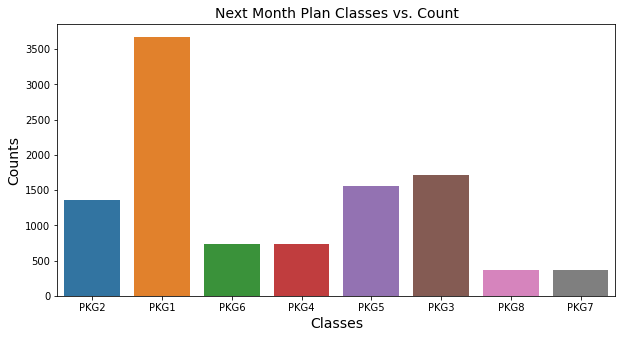

In [ ]:
# Bar plot for counts in each class in Training data
plt.subplots(figsize=(10,5))
sns.countplot(x='next_month_plan', data=train_set)
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Next Month Plan Classes vs. Count', fontsize=14)

### **Check features relationship**

In [ ]:
def plotDataGraph(x):
  temp = train_set.copy()
  # temp = temp.groupby(['status_group', x]).size().reset_index().pivot(columns='status_group', index=x)
  fig, axs = plt.subplots(figsize=(15, 5))
  plot = sns.countplot(x=x, hue='next_month_plan', data=temp)
  sns.despine()


# plot_cols=['device_type', 'device_category', 'gender', 'district_name',
#        'age_group', 'network_stay', 'average_monthly_bill_amount',
#        'dusage_sum', 'dusage_min', 'dusage_max', 'dusage_avg', 'dusage_days',
#        'dusage_stddev', 'vusage_onnet_sum', 'vusage_onnet_max',
#        'vusage_onnet_min', 'vusage_onnet_days', 'vusage_onnet_avg',
#        'vusage_onnet_stddev', 'vusage_offnet_sum', 'vusage_offnet_max',
#        'vusage_offnet_min', 'vusage_offnet_days', 'vusage_offnet_avg',
#        'vusage_offnet_stddev', 'number_of_fixed_bb_accounts',
#        'number_of_iptv_accounts', 'add_on_tot_rental', 'add_on_count']
# for i in range(0, len(plot_cols)):
#   plotDataGraph(plot_cols[i])

### **Handle Missing data**

In [ ]:
# Find the count of null values in train_data
train_set.isnull().sum()

device_type                      23
device_category                  30
gender                          135
district_name                     0
age_group                       135
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                      858
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg               8672
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg              3313
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts           0
add_on_tot_rental           

In [ ]:
# Find the count of null values in test_data
test_set.isnull().sum()

device_type                      13
device_category                  16
gender                           55
district_name                     0
age_group                        55
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                      364
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg               3715
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg              1426
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts           0
add_on_tot_rental           

In [ ]:
# Find the missing data
def findMissingData(data, title):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missingdata=pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
    missingdata= missingdata[missingdata["Percentage"] > 0]

    plt.subplots(figsize=(15,5))
    sns.barplot(missingdata.index, missingdata["Percentage"])
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Percentage', fontsize=14)
    plt.title('Feature vs. Percentage of missing data in ' + title, fontsize=14)
    
    return missingdata

Missing values in Train Data
Missing values in Test Data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,Total,Percentage
vusage_onnet_avg,3715,82.555556
add_on_count,1712,38.044444
add_on_tot_rental,1712,38.044444
vusage_offnet_avg,1426,31.688889
dusage_avg,364,8.088889
gender,55,1.222222
age_group,55,1.222222
device_category,16,0.355556
device_type,13,0.288889


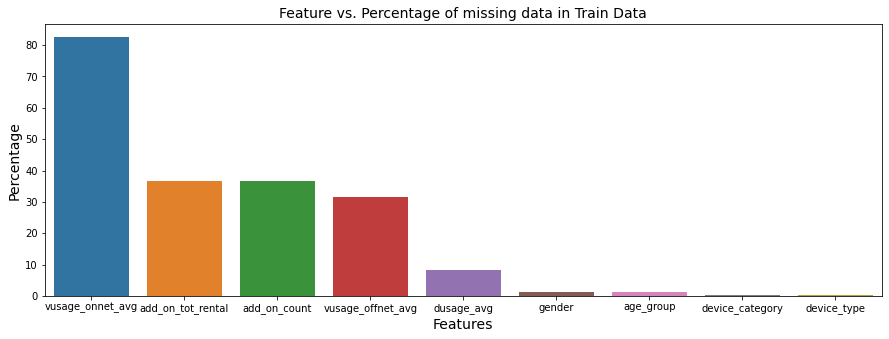

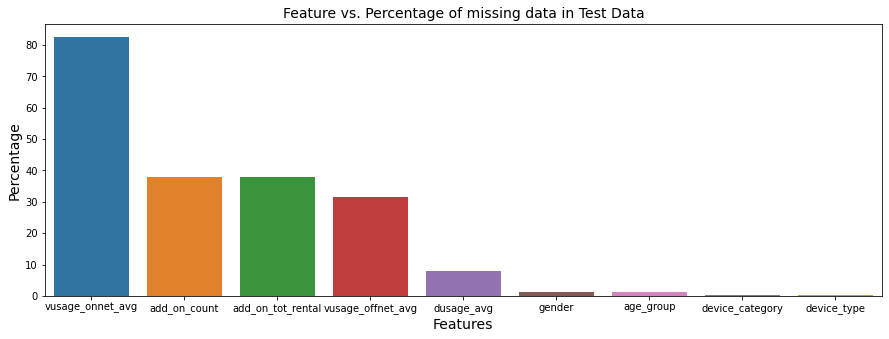

In [ ]:
# Show missing values in train_data
print("Missing values in Train Data")
findMissingData(train_set, "Train Data")

# Show missing values in test_data
print("Missing values in Test Data")
findMissingData(test_set, "Test Data")

In [ ]:
transform_cols = ['device_category', 'device_type', 'district_name', 'gender', 'age_group']
# transform_cols = ['device_type', 'district_name', 'gender', 'age_group']

for x in range(len(transform_cols)):
  train_set[transform_cols[x]] = LabelEncoder().fit_transform(train_set[transform_cols[x]].astype(str).str.strip())
  test_set[transform_cols[x]] = LabelEncoder().fit_transform(test_set[transform_cols[x]].astype(str).str.strip())

In [ ]:
# Drop "scheme_name" column in train_set and test_set
train_set.drop(['vusage_onnet_avg'], axis=1, inplace = True)
test_set.drop(['vusage_onnet_avg'], axis=1, inplace=True)

In [ ]:
train_set['add_on_count'].fillna(train_set['add_on_count'].median(), inplace = True)
test_set['add_on_count'].fillna(test_set['add_on_count'].median(), inplace = True)

train_set['add_on_tot_rental'].fillna(train_set['add_on_tot_rental'].median(), inplace = True)
test_set['add_on_tot_rental'].fillna(test_set['add_on_tot_rental'].median(), inplace = True)

train_set['vusage_offnet_avg'].fillna(train_set['vusage_offnet_avg'].mean(), inplace = True)
test_set['vusage_offnet_avg'].fillna(test_set['vusage_offnet_avg'].mean(), inplace = True)

train_set['dusage_avg'].fillna(train_set['dusage_avg'].mean(), inplace = True)
test_set['dusage_avg'].fillna(test_set['dusage_avg'].mean(), inplace = True)

train_set['age_group'].fillna(train_set['age_group'].median(), inplace = True)
test_set['age_group'].fillna(test_set['age_group'].median(), inplace = True)

train_set['gender'].fillna(train_set['gender'].mode()[0], inplace = True)
test_set['gender'].fillna(test_set['gender'].mode()[0], inplace = True)

train_set['device_category'].fillna(train_set['device_category'].median(), inplace = True)
test_set['device_category'].fillna(test_set['device_category'].median(), inplace = True)

train_set['device_type'].fillna(train_set['device_type'].mode()[0], inplace = True)
test_set['device_type'].fillna(test_set['device_type'].mode()[0], inplace = True)

In [ ]:
# train_set['next_month_plan'] = train_set['next_month_plan'].str.strip()
plan = {'PKG1':1,'PKG2':2,'PKG3':3,'PKG4':4,'PKG5':5,'PKG6':6,'PKG7':7,'PKG8':8}
train_set['next_month_plan'] = train_set['next_month_plan'].map(plan)
pd.to_numeric(train_set['next_month_plan'])
train_set['next_month_plan'].astype(int)

primary_identifier
6875768    2
6406277    1
3563570    6
1853666    4
2794331    4
          ..
1438655    6
7827264    1
1433957    6
8494507    1
3569439    1
Name: next_month_plan, Length: 10500, dtype: int64

In [ ]:
# # Class count
# c1, c2, c3, c4, c5, c6, c7, c8 = train_set['next_month_plan'].value_counts()

# # Divide by class
# d1 = train_set[train_set['next_month_plan'] == 1]
# d2 = train_set[train_set['next_month_plan'] == 2]
# d3 = train_set[train_set['next_month_plan'] == 3]
# d4 = train_set[train_set['next_month_plan'] == 4]
# d5 = train_set[train_set['next_month_plan'] == 5]
# d6 = train_set[train_set['next_month_plan'] == 6]
# d7 = train_set[train_set['next_month_plan'] == 7]
# d8 = train_set[train_set['next_month_plan'] == 8]

# # Undersample 0-class and concat the DataFrames of both class
# d1_under = d1.sample(c3)
# # d1_under = d1.sample(c3)
# # d1_under = d1.sample(c3)
# train_set = pd.concat([d1_under, d2, d3, d4, d5, d5, d6, d7, d8], axis=0)

# print('Random under-sampling:')
# print(train_set.shape)

In [ ]:
# train_set['next_month_plan'].value_counts()

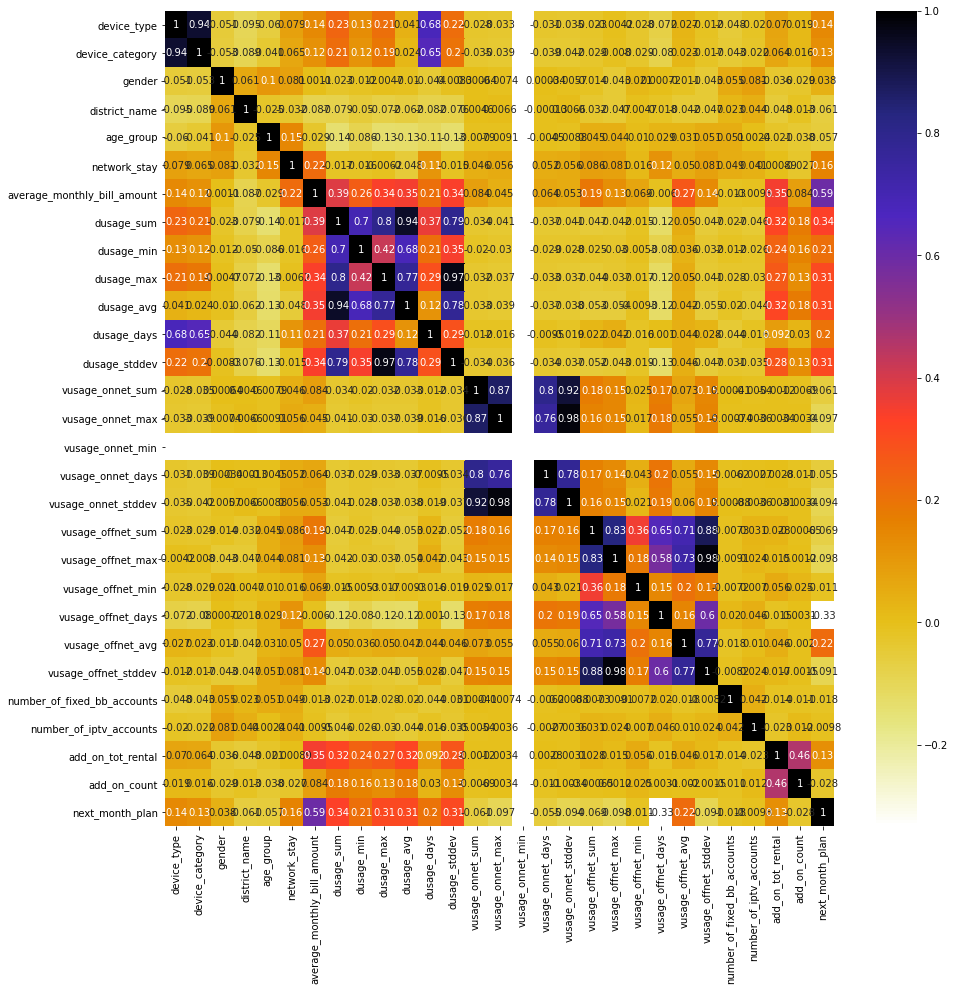

In [ ]:
# using Pearson Correlation
plt.figure(figsize=(15,15))
cor = train_set.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(train_set, 0.85)
len(set(corr_features))

6

In [ ]:
corr_features

{'device_category',
 'dusage_avg',
 'dusage_stddev',
 'vusage_offnet_stddev',
 'vusage_onnet_max',
 'vusage_onnet_stddev'}

In [ ]:
train_set.drop(corr_features, axis=1, inplace = True)
test_set.drop(corr_features, axis=1, inplace = True)

In [ ]:
X_train = train_set.drop('next_month_plan',axis=1)
y_train = train_set['next_month_plan']

### **Split train data for evaluation**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
train_columns = X_train.columns

In [ ]:
# using SMOTE for unbalanced train dataset
counter = Counter(y_train)
print ("Before", counter)
smt = SMOTE()
X_train_os, y_train = smt.fit_sample(X_train, y_train)
counter = Counter(y_train)
print ("After", counter)

Before Counter({1: 3673, 3: 1717, 5: 1558, 2: 1354, 6: 740, 4: 735, 7: 364, 8: 359})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

After Counter({2: 3673, 1: 3673, 6: 3673, 4: 3673, 5: 3673, 3: 3673, 8: 3673, 7: 3673})


In [ ]:
# # using SMOTE-ENN for unbalanced train dataset
# counter = Counter(y_train)
# print ("Before", counter)
# smtenn = SMOTEENN()
# X_train_os, y_train = smtenn.fit_sample(X_train, y_train)
# counter = Counter(y_train_os)
# print ("After", counter)

In [ ]:
# # scatter plot of examples by class label
# plt.subplots(figsize=(8,5))
# for label, _ in counter.items():
#   row_ix = where(y_train == label)[0]
#   pyplot.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
# plt.legend()
# plt.show()

In [ ]:
X_train = pd.DataFrame(X_train_os, columns=X_train.columns)

In [ ]:
# X_train = StandardScaler().fit_transform(X_train)
# X_test = StandardScaler().fit_transform(X_test)

In [ ]:
# X_train.head()

In [ ]:
# y_train.head()

# **Model Training**

In [ ]:
# Decision Tree Classifier
modelDTC = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=10,
    min_samples_leaf=1, 
    min_samples_split=2
    )

# fit the DTC model on the training dataset
modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Random Forest Classifier 
modelRFC = RandomForestClassifier(bootstrap=True,
                                  criterion='gini',
                                  min_impurity_decrease=0.0,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=1000,
                                  n_jobs=1,
                                  oob_score=True,
                                  random_state=0
                                  )

# fit the RFC model on the training dataset
modelRFC.fit(X_train, y_train)

print("OOB Score: %.4f" % modelRFC.oob_score_)

OOB Score: 0.8439


In [ ]:
# creating XGBoost classifier model object
modelXGB = XGBClassifier(learning_rate=0.01, 
                          n_estimators=200,
                          max_depth=3,
                          min_child_weight=5,
                          reg_alpha=0.005,
                          # subsample=1,
                          # objective='binary:logistic',
                          nthread=2,
                          colsample_bytree=0.8,
                          )

# fit the XGBoost model on the training dataset
modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=200, n_jobs=1,
              nthread=2, objective='multi:softprob', random_state=0,
              reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# # Cat Boost Classifier
# modelCBC = CatBoostClassifier(iterations=2000,
#                               random_state=0,
#                               max_depth=3,
#                               reg_lambda=30,
#                               max_ctr_complexity=5,
#                               eval_metric='AUC',
#                               task_type='CPU',
#                               od_type='Iter',
#                               od_wait=500
#                               )

# # fit the CBC model on the training dataset
# # modelCBC.fit(X_train, y_train, verbose=1000, eval_set=[(X_train,y_train),(X_test,y_test)], use_best_model=True, cat_features=categorical)
# modelCBC.fit(X_train, y_train, verbose=1000)

In [ ]:
# # Display first 5 important features in a chart
# importances = pd.DataFrame(modelCBC.feature_importances_, index = train_columns)
# importances.sort_values(by = 0, inplace=True, ascending = False)
# importances = importances
# plt.figure(figsize=(10, 15)) 
# sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances");
# sns.despine()

# **Model Predictions**

### **Predictions for split test data**

In [ ]:
def calcScore(model, modelName):
  if X_test is not None:
    print ("Score calculated for " + modelName + "\n")

    # make probability predictions with the model for held out test data
    y_test_pred = model.predict(X_test)

    # Confusion matrix for held out test data
    confusionmatrix = confusion_matrix(y_test, y_test_pred)
    # print(confusionmatrix)
    plt.figure(figsize=(4,3))
    sns.heatmap(confusionmatrix, annot=True, cmap="Greys", fmt="d", 
                xticklabels = ['PKG1', 'PKG2', 'PKG3', 'PKG4', 'PKG5', 'PKG6', 'PKG7', 'PKG8'], 
                yticklabels = ['PKG1', 'PKG2', 'PKG3', 'PKG4', 'PKG5', 'PKG6', 'PKG7', 'PKG8'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title("Confusion Matrix - " + modelName);
    
    # Classification report for held out test data
    print(classification_report(y_test, y_test_pred))

In [ ]:
if modelDTC is not None:
  # calcScore(modelDTC, "Decision Tree")

In [ ]:
if modelRFC is not None:
  # calcScore(modelRFC, "Random Forest")

In [ ]:
if modelXGB is not None:
  # calcScore(modelXGB, "XGBoost")

In [ ]:
if modelCBC is not None:
  # calcScore(modelCBC, "Cat Boost")

### **Predictions for submission test data**

In [ ]:
model = modelRFC

In [ ]:
# Make predictions for test data
X_pred = test_set
# X_pred = StandardScaler().fit_transform(X_pred)
y_pred = model.predict(X_pred)

In [ ]:
# assign predicted values to submission
submission['next_month_plan'] = y_pred

# convert package name to package number
# submission['next_month_plan'] = submission['next_month_plan'].str.strip().str[-1]

# create csv from submission
submission.to_csv('submission.csv', index=False)

In [ ]:
# download submission file
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>